In [3]:
from pynq import Overlay
overlay = Overlay("base.bit")

In [4]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.arduino import Arduino_IO
import time
import matplotlib.pyplot as plt
from ipywidgets import *

base = BaseOverlay('base.bit')
triggerGPIO = Arduino_IO(base.iop_arduino.mb_info, 0, 'out')
echoGPIO = Arduino_IO(base.iop_arduino.mb_info, 1, 'in')


In [5]:
i = 0
outputList = []
while i <= 10:
    triggerGPIO.write(0)
    time.sleep(1)
    triggerGPIO.write(1)
    start = time.time()
    time.sleep(0.1)
    triggerGPIO.write(0)
    #start = time.time()
    while True:
         if echoGPIO.read() == 1:
            end = time.time()
            break
    duration = end - start
    #calc distance 
    distance = ( duration * 34 ) / 2
    outputList.append(distance)
    #print(distance)
    time.sleep(1)
    i+=1

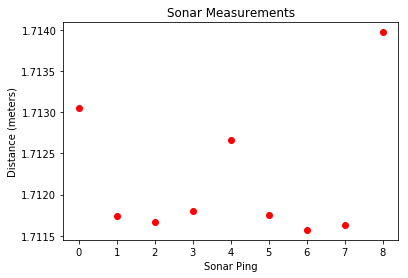

In [6]:
for j in range (0,9):
    plt.plot(j,outputList[j],'ro')
    plt.title("Sonar Measurements")
    plt.xlabel("Sonar Ping")
    plt.ylabel("Distance (meters)")
plt.show()